In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
data_fr = pd.read_csv("Bengaluru_House_Data.csv")
data_fr.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data_fr.shape

(13320, 9)

In [4]:
#removed nonsignificant columns for simplicity
new_data_fr = data_fr.drop(["area_type","availability","society"],axis='columns')
data_fr = new_data_fr
data_fr.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
temp_fr = data_fr.dropna()
data_fr = temp_fr

In [11]:
data_fr.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [14]:
data_fr['bedrooms'] = data_fr['size'].apply(lambda x: int(x.split(' ')[0]))
data_fr.bhk.unique()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31696\1058284570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fr['bedrooms'] = data_fr['size'].apply(lambda x: int(x.split(' ')[0]))


array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [18]:
data_fr.head()
temp_fr = data_fr.drop(['size','bhk'],axis='columns')
data_fr = temp_fr
data_fr.head()

,location,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [19]:
data_fr['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
# to check whether columns contains not a single number values
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


data_fr[~data_fr['total_sqft'].apply(is_float)].head(8)

,location,total_sqft,bath,balcony,price,bedrooms
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2


In [21]:
#funtion for get the average value from ranges of values
def convert_sqft_to_num(x):
    num = x.split('-')
    if len(num) == 2:
        return (float(num[0])+float(num[1]))/2
    try:
        return float(x)
    except:
        return None  


In [22]:
df= data_fr.copy()

df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)

,location,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [23]:
#Applied feature engineering to get more suitable features for training
df_FE = df.copy()

df_FE['price_per_sqft'] = df_FE['price']*100000/df_FE['total_sqft']
df_FE.head()

,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
#saved the csv
df_FE.to_csv("House_prices.csv",index=False)

In [25]:
#to findout how many common location categories there
df_FE.location = df_FE.location.apply(lambda x: x.strip()) #removed the spaces
location_statics = df_FE['location'].value_counts(ascending=False)
location_statics

Whitefield           514
Sarjapur  Road       372
Electronic City      302
Kanakpura Road       259
Thanisandra          233
                    ... 
Subbannaiah Palya      1
whitefiled             1
Medi Agrahara          1
Sadduguntepalya        1
Abshot Layout          1
Name: location, Length: 1248, dtype: int64

In [26]:
location_stats_less_than_10 = location_statics[location_statics<=10]
location_stats_less_than_10

1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Nagappa Reddy Layout     10
Dairy Circle             10
                         ..
Subbannaiah Palya         1
whitefiled                1
Medi Agrahara             1
Sadduguntepalya           1
Abshot Layout             1
Name: location, Length: 1013, dtype: int64

In [27]:
#I renamed all locations with 10 or less than 10 locations as 'other' for simplicity 
df_FE.location = df_FE.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [32]:
df_FE['location'].unique().shape

(236,)

In [33]:
df_FE[df_FE.total_sqft/df_FE.bedrooms<300].head()

,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [35]:
df_OR = df_FE[~(df_FE.total_sqft/df_FE.bedrooms<300)]
df_OR.shape

(12013, 7)

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df_new = remove_pps_outliers(df_OR)
df_new.shape

(9852, 7)

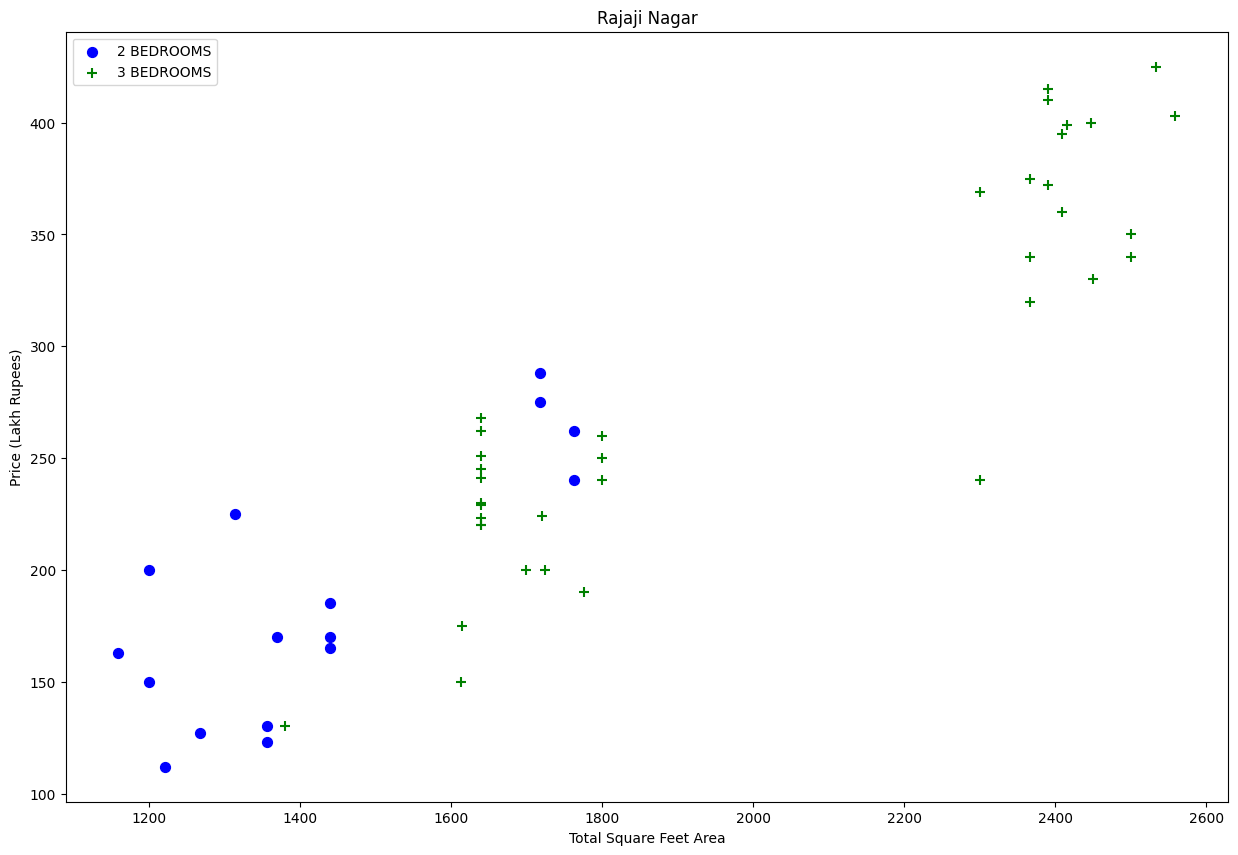

In [37]:
def plot_scatter_chart(df,location):
    bedrooms2 = df[(df.location==location) & (df.bedrooms==2)]
    bedrooms3 = df[(df.location==location) & (df.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)

    plt.scatter(bedrooms2.total_sqft,bedrooms2.price,color='blue',label='2 BEDROOMS', s=50)
    plt.scatter(bedrooms3.total_sqft,bedrooms3.price,marker='+', color='green',label='3 BEDROOMS', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df_new,"Rajaji Nagar")

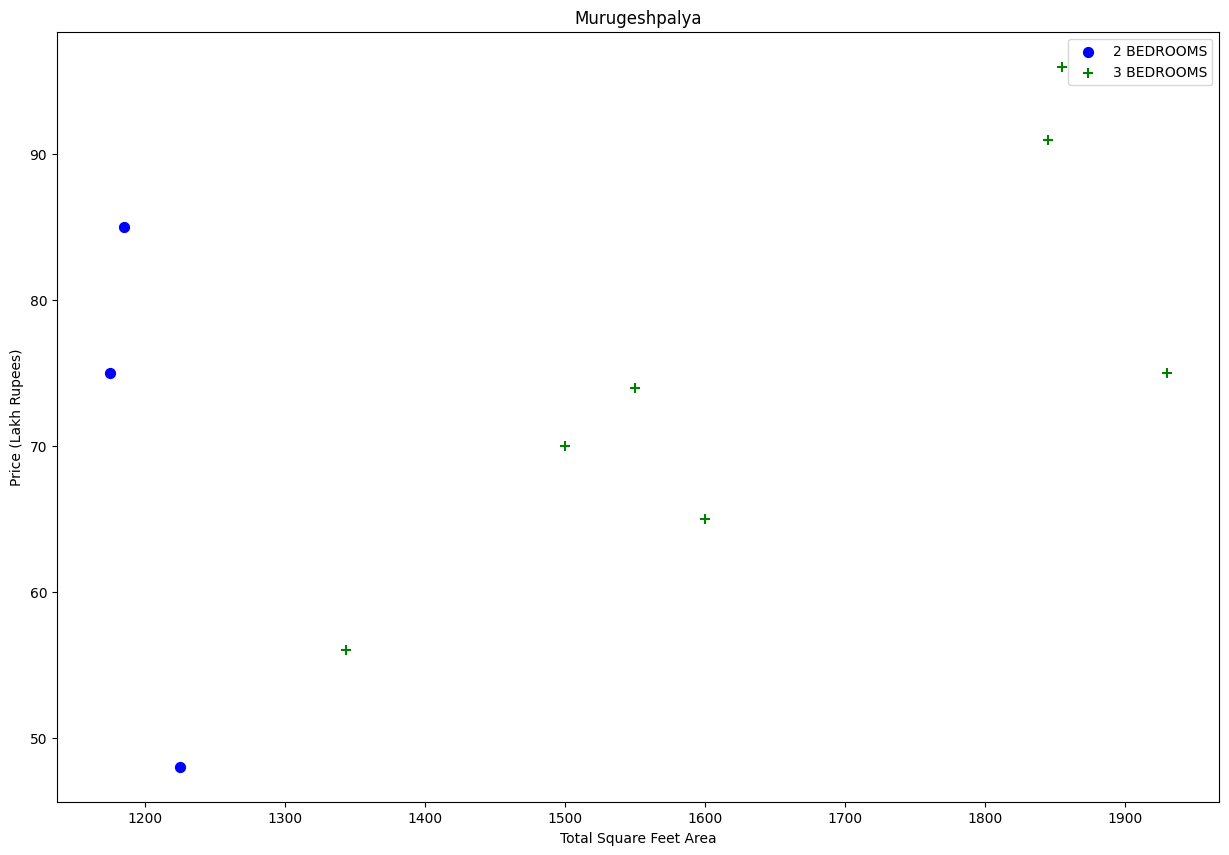

In [38]:
plot_scatter_chart(df_new,"Murugeshpalya")

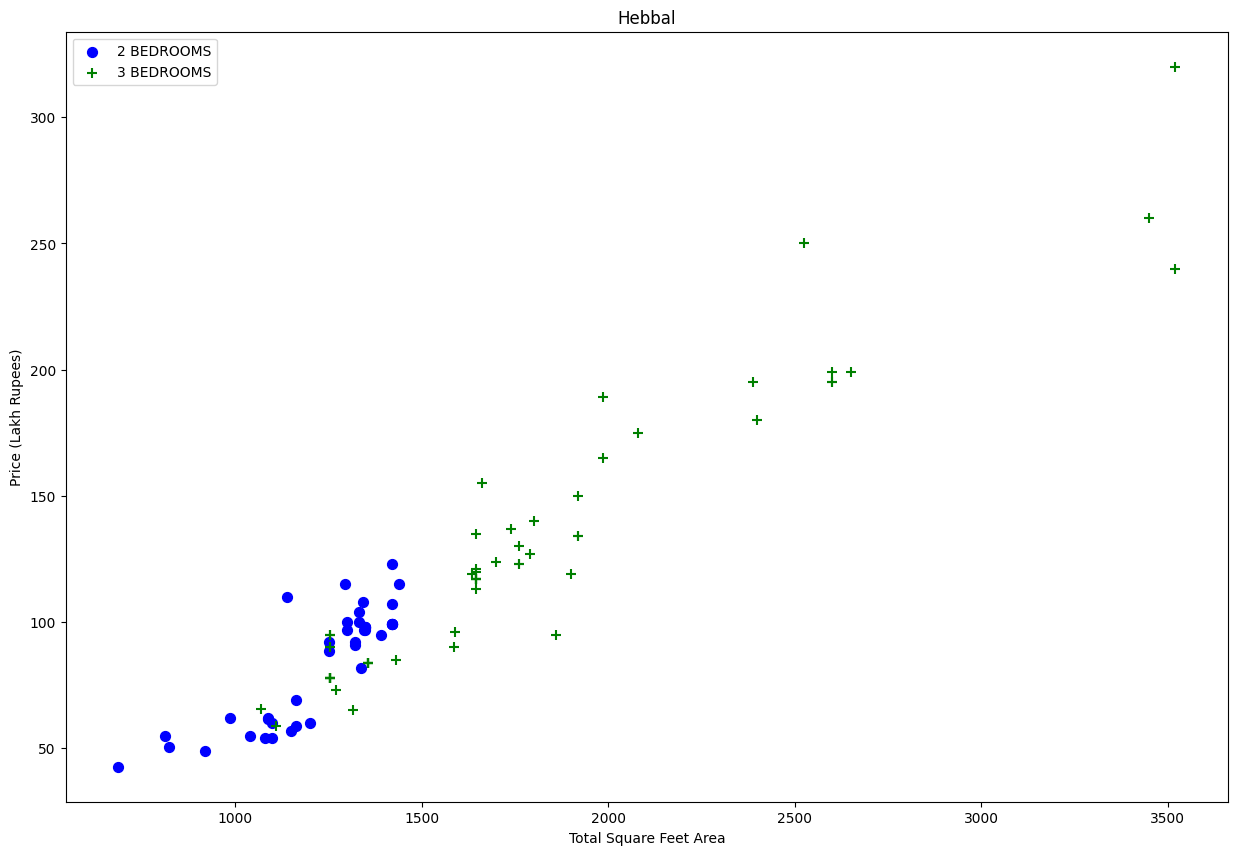

In [39]:
plot_scatter_chart(df_new,"Hebbal")

In [40]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('bedrooms'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df.price_per_sqft),
                'std': np.std(bedroom_df.price_per_sqft),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby('bedrooms'):
            stats = bedroom_stats.get(bedroom-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


df_BOR = remove_bedroom_outliers(df_new)
df_BOR.shape

(7014, 7)

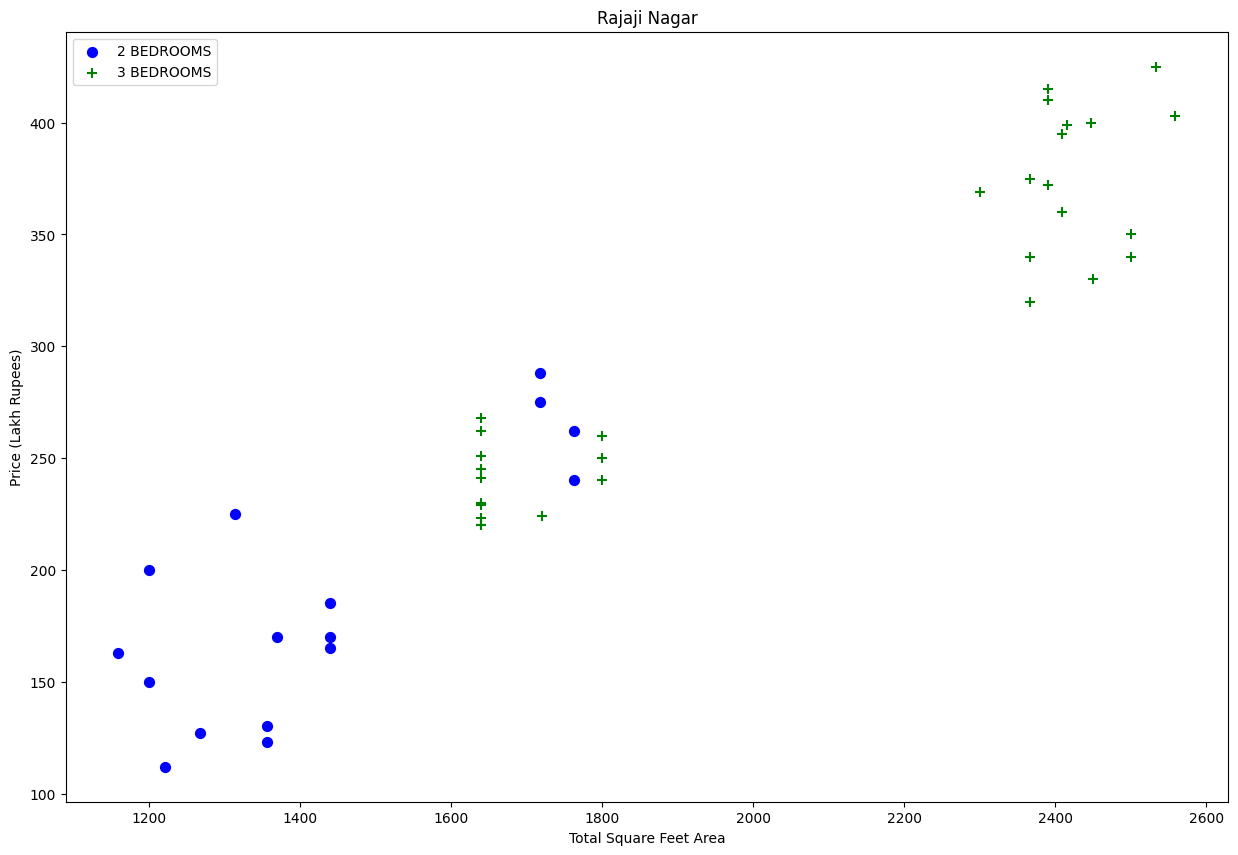

In [44]:
plot_scatter_chart(df_BOR,"Rajaji Nagar")

Text(0, 0.5, 'Count')

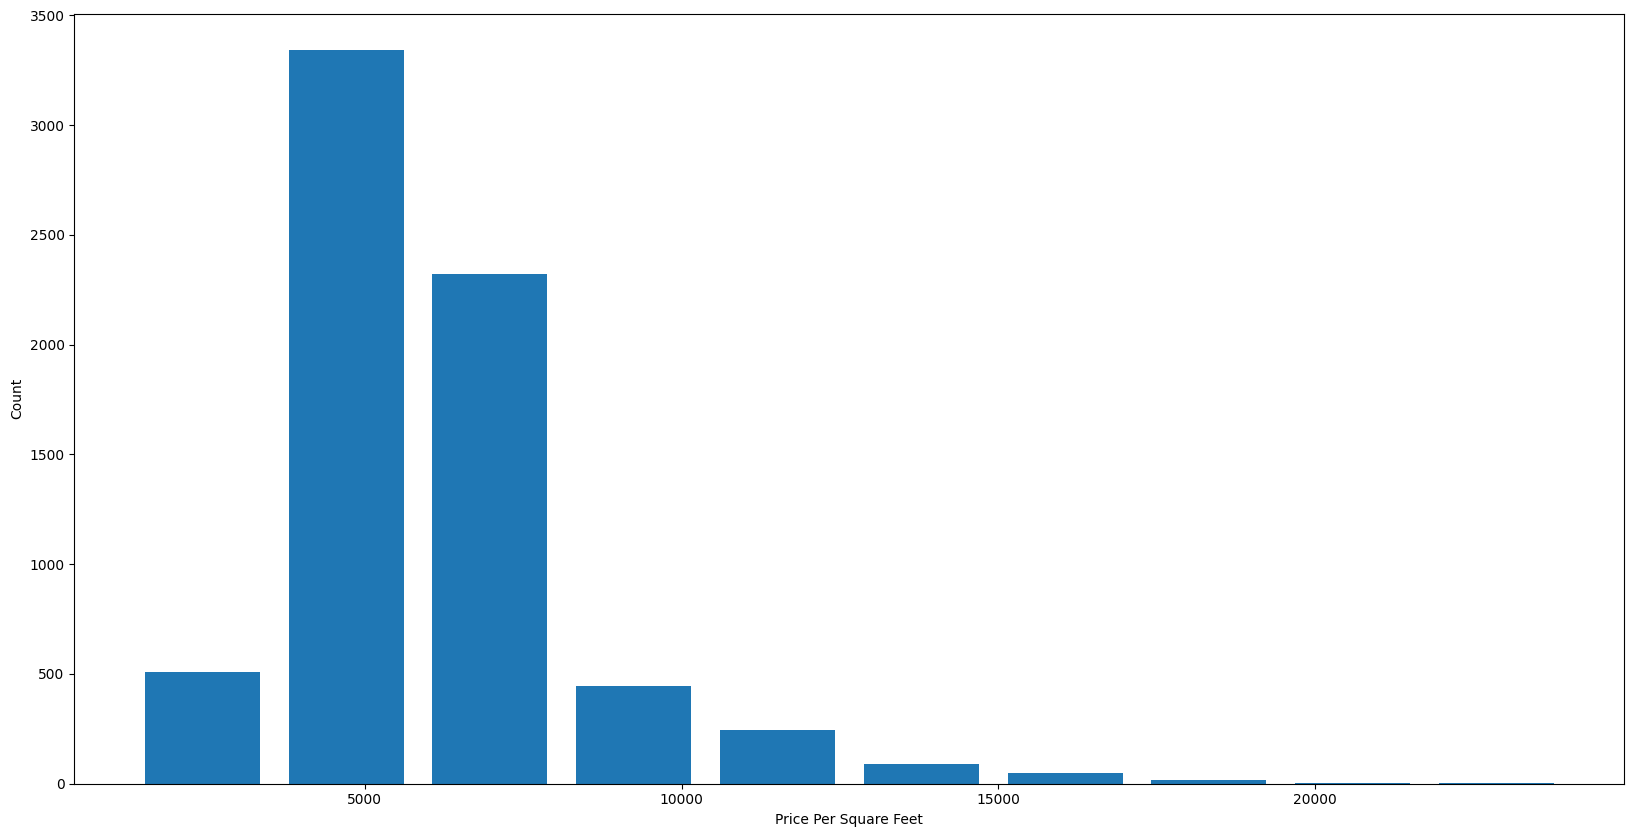

In [45]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df_BOR.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [46]:
df_BOR[df_BOR.bath>df_BOR.bedrooms+2]

,location,total_sqft,bath,balcony,price,bedrooms,price_per_sqft
1542,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6443,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8082,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [47]:
df1 = df_BOR[df_BOR.bath<df_BOR.bedrooms+2]
df1.shape

(6947, 7)

In [49]:
df2 = df1.drop(['balcony','price_per_sqft'],axis='columns')
df2.head(3)

,location,total_sqft,bath,price,bedrooms
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [50]:
#one hot encoded the location due to having non numeric data type
dummies = pd.get_dummies(df2.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df3 = pd.concat([df2,dummies.drop('other',axis='columns')],axis='columns')
df3.head()

,location,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#now drop the location column
df4 = df3.drop('location',axis='columns')
df4.head(2)

,total_sqft,bath,price,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#generate X values
X = df4.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
Y= df4.price
Y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [56]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

## Linear regression model

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
#evaluation
model.score(X_test,y_test)

0.8587320103453174

In [59]:
def Price_predictor(location,sqft,bath,bedrooms):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [60]:
Price_predictor('Indira Nagar',1000, 2, 2)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\PythonVEnv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


152.2210300637061